# Exploratory Data Analysis of houses dataset

#### General setup

In [3]:
# Importing Pandas, numpy and Matplotlib. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import csv-data to dataframe
df0 = pd.read_csv(r"housing.csv")


#### First glance at data - quality check

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We see that there are 207 missing values in *total_bedrooms*, for now remove those rows, should be OK (<10%).

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Columns: 10 entries, longitude to ocean_proximity
dtypes: float64(9), object(1)
memory usage: 1.7+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433

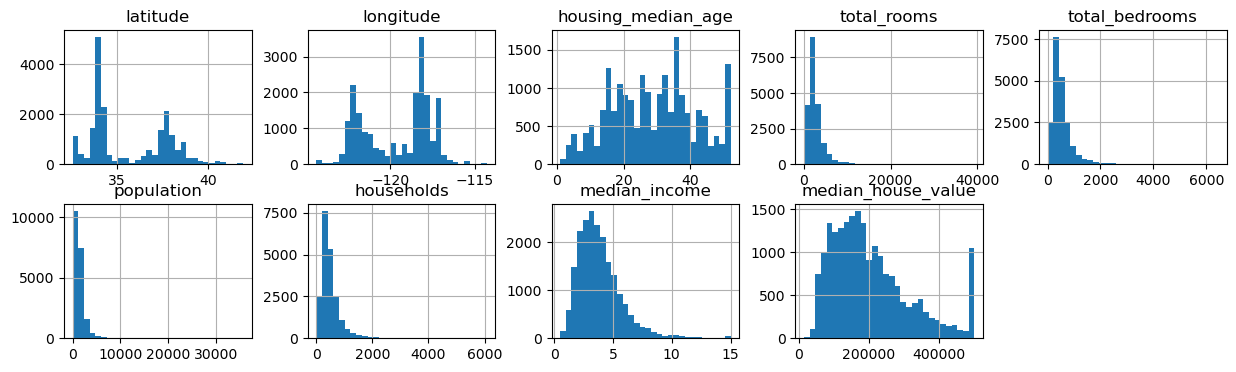

In [5]:
# Remove missing values. Show some statistics for the numerical categories
df =df0.dropna()
print(df.info(verbose=False))
print(df.describe())

# Prepare some suitable column list cases
col_all_num = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']
col_cat = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']
# Lets have a look at the data ... 
ax=df.hist(column=col_all_num, bins=30,figsize=(15,4),layout=(2,5))


OK, some columns have been truncated, *median_house_value* and *housing_median_age*, lets keep them as is for now

#### Generate new sub data sets
The input data set consists of a number of statistical data for house pricing in some Californian blocks categorized by the geographical location:
- Island
- Near bay 
- Near ocean
- Inland
- Less than 1 hour from ocean

In [6]:
# Change object type to Categorical. Show some statistics for the category
df.loc[:,'ocean_proximity'] = pd.Categorical(df.loc[:,'ocean_proximity'])
df.info()
df['ocean_proximity'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

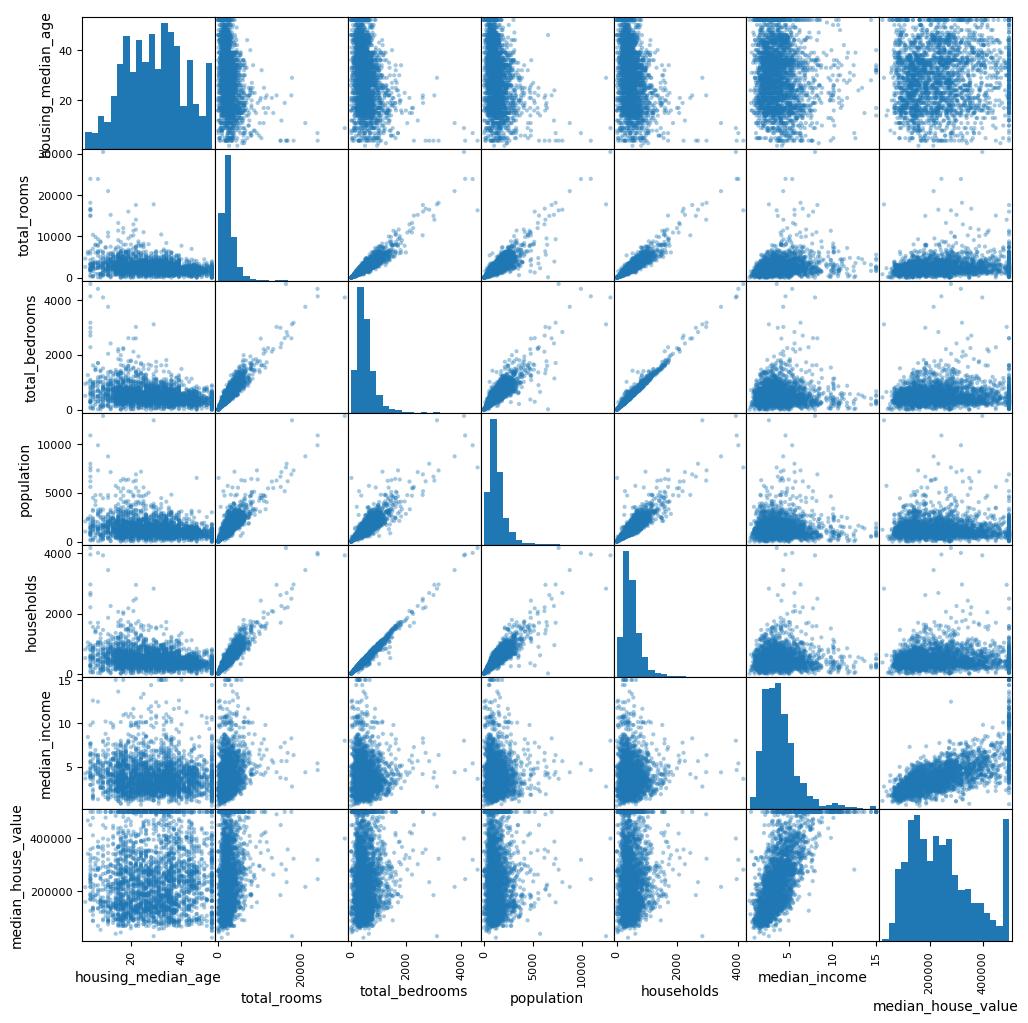

In [7]:
#
df_gr   = df.groupby(by='ocean_proximity',observed=True)
df_inl  = df_gr.get_group('INLAND')
df_nb   = df_gr.get_group('NEAR BAY')
df_no   = df_gr.get_group('NEAR OCEAN')
df_1ho  = df_gr.get_group('<1H OCEAN')
df_is   = df_gr.get_group('ISLAND')


# pd.plotting.scatter_matrix(df_inl.drop(columns=['latitude','longitude']), diagonal='hist',alpha=0.4,figsize=(12,12),hist_kwds={'bins':20})
p = pd.plotting.scatter_matrix(df_no.drop(columns=['latitude','longitude']), diagonal='hist',alpha=0.4,figsize=(12,12),hist_kwds={'bins':20})


#### Visualizations

In [8]:
# Plot the geographic info separately
def plot_vs_geo(df,col_str,title_str):
  df_sorted=df.sort_values(by=col_str,ascending=True) # Stack the plot order
  ax = df_sorted.plot( label=col_str,kind='scatter',x='longitude',y='latitude', alpha=0.4,s=4,c=col_str, colorbar=True)
  ax.set_title(title_str)


<Figure size 640x480 with 0 Axes>

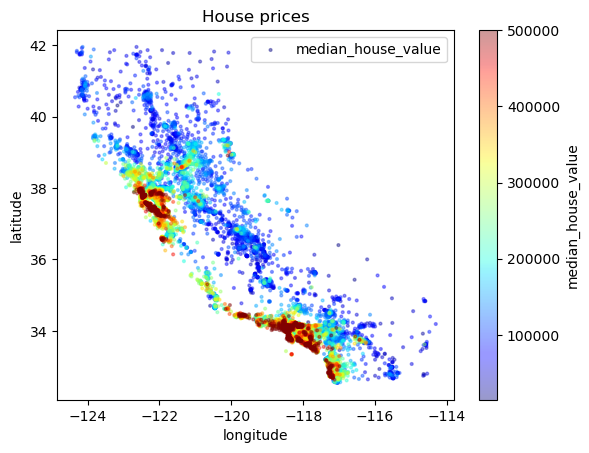

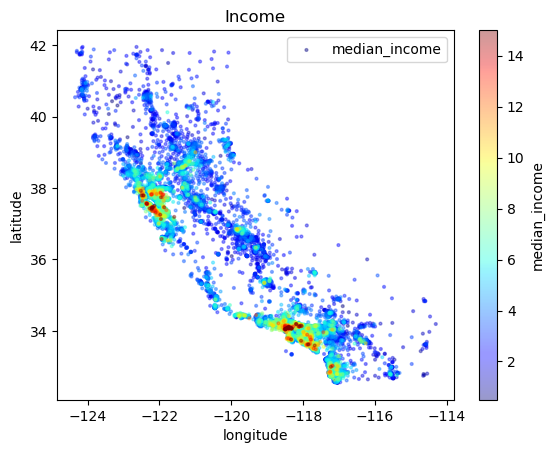

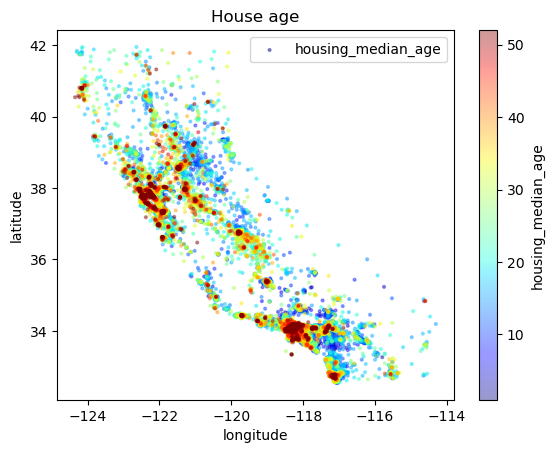

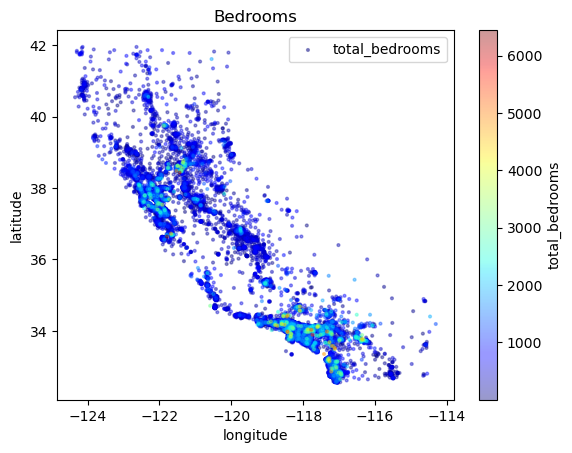

In [9]:

plt.set_cmap('jet')
plot_vs_geo(df,'median_house_value','House prices')
plot_vs_geo(df,'median_income','Income')
plot_vs_geo(df,'housing_median_age','House age')
# plot_vs_geo(df,'ocean_proximity')
plot_vs_geo(df,'total_bedrooms','Bedrooms')


One clear trend is that the house prices increases when area is close to ocean, bay or larger cities, probably San Fransico bay area and Los Angeles. The income seems to be higher in the larger cities as expected.

#### Data cross correlation

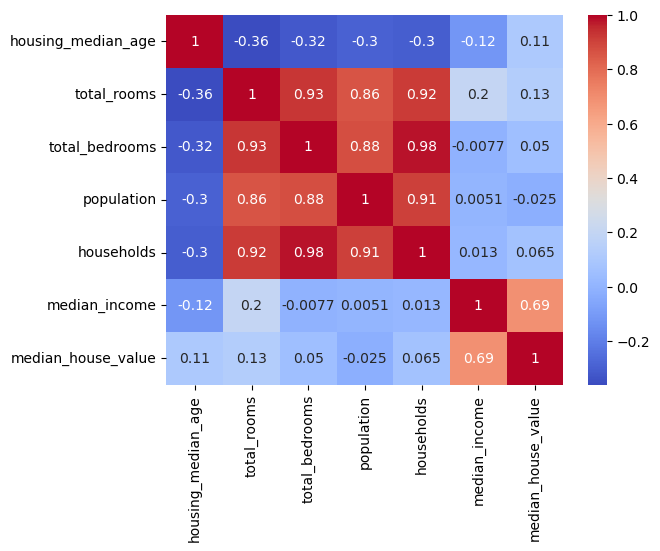

In [10]:
cc=df[col_cat]
corr = cc.corr()
s = sns.heatmap(corr, cmap="coolwarm", annot=True)

(0.0, 15.0)

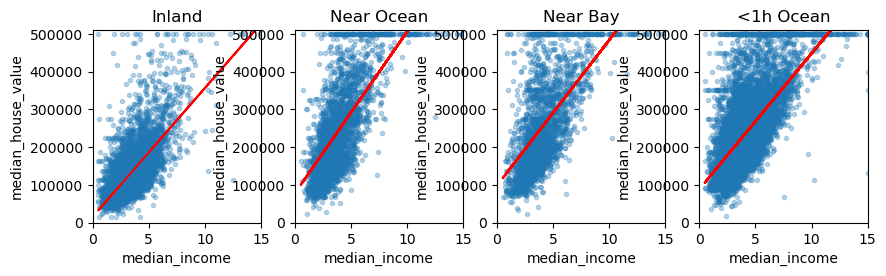

In [11]:
def pplot(df,x_str,y_str,ax,title_str):
  x = df.loc[:,x_str].values
  y = df.loc[:,y_str].values
  ax.plot(x, y, ".",alpha=0.3)
  ax.set_xlabel(x_str)
  ax.set_ylabel(y_str)
  m, b = np.polyfit(x, y, 1)
  ax.plot(x, m*x+b,'r')
  ax.set_title(title_str)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4, nrows=1, figsize=(10, 2.5))
pplot(df_inl,'median_income','median_house_value',ax1,'Inland')
pplot(df_no,'median_income','median_house_value',ax2,'Near Ocean')
pplot(df_nb,'median_income','median_house_value',ax3,'Near Bay')
pplot(df_1ho,'median_income','median_house_value',ax4,'<1h Ocean')
ax1.set_ylim([0,510000])
ax1.set_xlim([0,15])
ax2.set_ylim([0,510000])
ax2.set_xlim([0,15])
ax3.set_ylim([0,510000])
ax3.set_xlim([0,15])
ax4.set_ylim([0,510000])
ax4.set_xlim([0,15])


The house value is clamped at ~500.000$ giving a weird linear fit. Try to remove those values.

(0.0, 15.0)

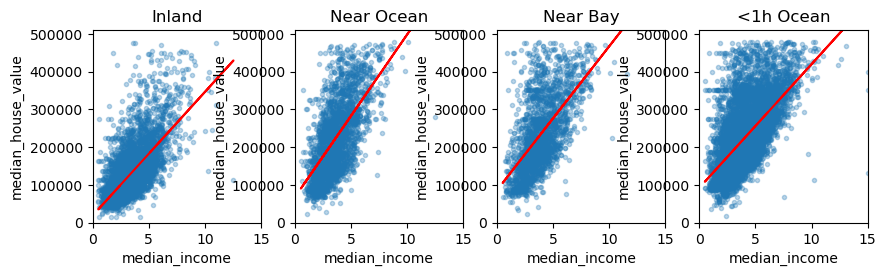

In [12]:
df_inl_c = df_inl[df_inl.median_house_value < 480000]
df_no_c = df_no[df_no.median_house_value < 480000]
df_nb_c = df_nb[df_nb.median_house_value < 480000]
df_1ho_c = df_1ho[df_1ho.median_house_value < 480000]
fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4, nrows=1, figsize=(10, 2.5))
pplot(df_inl_c,'median_income','median_house_value',ax1,'Inland')
pplot(df_no_c,'median_income','median_house_value',ax2,'Near Ocean')
pplot(df_nb_c,'median_income','median_house_value',ax3,'Near Bay')
pplot(df_1ho_c,'median_income','median_house_value',ax4,'<1h Ocean')
ax1.set_ylim([0,510000])
ax1.set_xlim([0,15])
ax2.set_ylim([0,510000])
ax2.set_xlim([0,15])
ax3.set_ylim([0,510000])
ax3.set_xlim([0,15])
ax4.set_ylim([0,510000])
ax4.set_xlim([0,15])


The scatterplot looks nicer but the linear fit still seems to be a bit strange ...

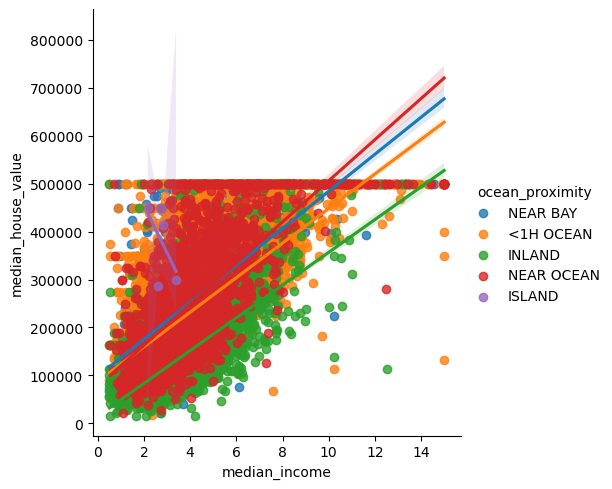

In [13]:
# Just for fun try seaborn plots
s=sns.lmplot(df,y='median_house_value',x='median_income',hue='ocean_proximity')


#### Självutvärdering
1. Har något varit utmanande i kunskapskontrollen? Om ja, hur har du hanterat det? 
> Inget speciellt, har lång erfarenhet från Matlab och har "fuskat" lite med Python innan så det var hyfsat rättfram. Det finns en rätt bra cheat sheet för Matlab<-> numPy ;)
2. Vilket betyg anser du att du ska ha och varför?
> Tycker nog ändå VG - har försökt att följa rekommederat arbetssätt vid EDA och har gjort en del egna funktioner för att få fram bra visualiseringar.
3. Något du vill lyfta fram till Antonio? 
> Nej, inget för den här delkursen 


